## 决策树分类

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# return_X_y = True表示自变量和因变量独立导出来
X,y = load_iris(return_X_y = True)
# 为了方便可视化，这里选择两个特征
X = X[:,:2]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# criterion：不纯度度量标准，默认为gini。gini：基尼系数 entropy：信息熵
# splitter：选择分裂节点的方式。默认为best。best：在最好的位置分裂节点。random：在随机的位置分裂节点。
# max_depth：树的最大深度，默认为None（不限制深度）。
# min_samples_split：分裂节点的最小样本数，默认为2。
# min_samples_leaf：分裂节点后，叶子节点最少的样本数量，默认为1。
# max_features：分裂节点时，考虑的最大特征数量，默认为None（考虑所有特征）。# random_state：随机种子。
# random_state：随机种子。
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
# 训练集效果很好
print(tree.score(X_train,y_train))
# 但测试集效果很一般
print(tree.score(X_test,y_test))

0.9375
0.6578947368421053


我们发现，模型存在严重的过拟合倾向，原因在于，如果没有指定树的深度，则默认会训练一颗完全生 长的决策树（不限深度），这会容易导致模型复杂化，从而过分依赖于训练集数据的特性，造成过拟合。

D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_

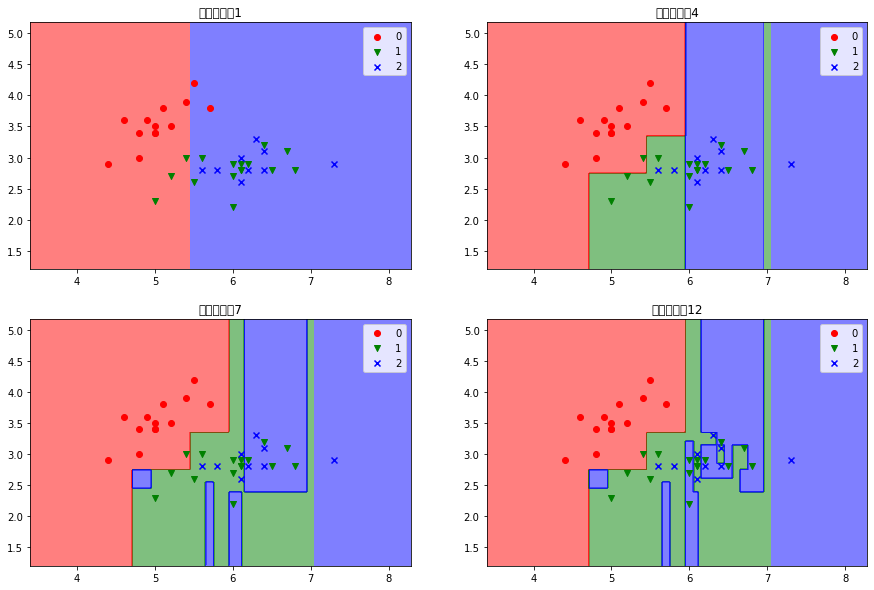

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[: len(class_label)])
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    X1, X2 = np.meshgrid(x1, x2)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1],
        c=cmap.colors[i], label=class_, marker=marker[i])
    plt.legend()
    
plt.figure(figsize=(15, 10))
for index, depth in enumerate([1, 4, 7, 12], start=1):
    plt.subplot(2, 2, index)
    plt.title(f"最大深度：{depth}")
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    plot_decision_boundary(tree, X_test, y_test)


D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Install\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_

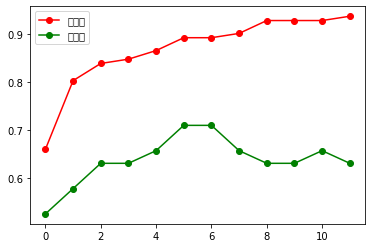

In [12]:
# 定义列表，用来存储在不同深度下，模型的分值。
train_score = [] 
test_score = []
for depth in range(1, 13):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth) 
    tree.fit(X_train, y_train) 
    train_score.append(tree.score(X_train, y_train)) 
    test_score.append(tree.score(X_test, y_test))

plt.plot(train_score, marker="o", c="red", label="训练集")
plt.plot(test_score, marker="o", c="green", label="测试集") 
plt.legend()


在深度达到6的时候是最好的

In [19]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
# 训练集效果很好
print(tree.score(X_train,y_train))
# 但测试集效果很一般
print(tree.score(X_test,y_test))

0.8928571428571429
0.7105263157894737


## 决策树回归

In [20]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X,y = load_boston(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# 回归树的参数可以参考决策树的参数
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.8290972700366354
0.6354364289453209
